In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dim = 3
points1 = np.random.randn(20, dim)
points2 = np.random.randn(20, dim) + np.array([5, 5, 5])
points3 = np.random.randn(20, dim) + np.array([-5, 10, 0])

points = np.concatenate( (points1, points2, points3) )

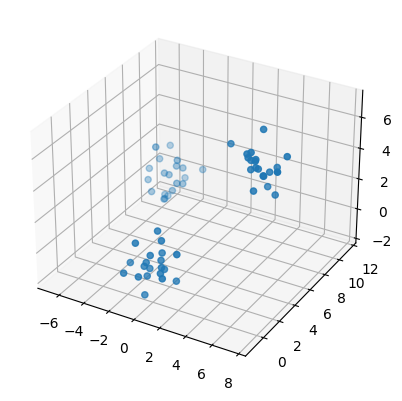

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# 이렇게 하면 색 다르게 표현할 수 있음
# ax.scatter(points1[:, 0], points1[:, 1], points1[:, 2])
# ax.scatter(points2[:, 0], points2[:, 1], points2[:, 2])
# ax.scatter(points3[:, 0], points3[:, 1], points3[:, 2])



plt.show()

In [17]:
points.shape[0]

60

In [25]:
k = 10
def kmeans(k, points):
    prev_assignments = []
    # 1. random centroid 추출
    centroids = points[np.random.choice(points.shape[0], size=k, replace=False)] # points들 중 k개를 뽑는 것, 주어진 범위에서 몇개를 골라낸다
    
    for epoch in range(10):
        # 2. 각 point가 어떤 centroid랑 가장 가까운지 계산(즉, 어느 클러스터에 속하는지 계산)
        # ex) assignments = [1, 3, 2, 2, 4, 3, 1, 4, 3, 6]
        assignments = []
        for p in points:
            min_dist = 9e9 # 굉장히 큰 값, 9곱하기 10의 9승
            min_cid = -1 # 몇번째 centroid랑 가장 가까운지
            for cid, c in enumerate(centroids):
                dist = ((c - p) ** 2).sum() # 루트 안 씌웠음
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid
                    
            assignments.append(min_cid)
            
        # 3. assignmen를 기준으로 새로운 centroid를 계산하기
        centroids = np.array([points[np.array(assignments) == cid].mean(axis=0) for cid, c in enumerate(centroids)])
            
        # 예시
        # assignments = [1, 3, 2, 2, 4, 3, 1, 4, 3, 6]
        # enumerate(assignments)    => [(0, 1),(1,3),(2,2),(3,2)(4,4),(5,3),(6,1),(7,4),(8,3),(9,6)]
        
        # assignments = 1    => [True, Fasle, False, False, False, False, True, False, False, False] # 1만 True로
        # points[assignments == 1] = [[2,3,4], [4,5,6]]
        
        # 4. 변경이 발생했는지 확인
        if prev_assignments == assignments:
            break
        prev_assignments = assignments
        
    return assignments, centroids
            

### -----------이건 교안대로 한 코드

In [19]:
def assign(point, centroids, k):
    return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

In [20]:
def compute_centroids(assignments, points, k):
    vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
    counts = [0] * k
    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1

    return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

In [21]:
def kmeans(k, points):
    prev_assignment = []
    # 1. 임의로 k개의 점을 중심점으로 선택 (forgy)
    centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
    for epoch in range(10):
    # 2. 각 점이 할당될 중심점을 계산
        assignments = [assign(p, centroids, k) for p in points]
        # 3. 새로운 centroid 계산
        centroids = compute_centroids(assignments, points, k)
        # 4. 클러스터에 변화가 없을 경우 종료
        if prev_assignment == assignments:
            break
        prev_assignment = assignments
    return assignments, centroids

### ----------------여기까지 교안

In [26]:
np.random.choice(10, size=3, replace=False) # replace=False -> 중복 제거

array([6, 7, 5])

In [27]:
assignments, centroids = kmeans(3, points)

print(assignments)
print(centroids)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
[[-5.37900934  9.27391091 -0.51299616]
 [-4.69363833  9.68686138  0.96449408]
 [ 2.59478736  2.41561878  2.81385012]]


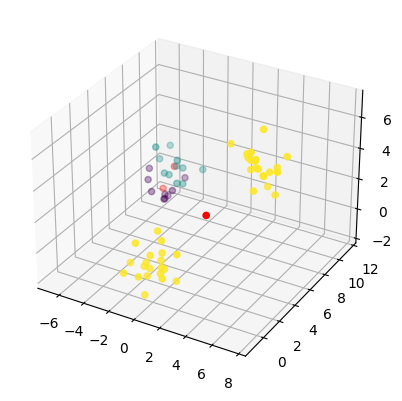

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=assignments)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c="red")


plt.show()

이미지 처리 응용

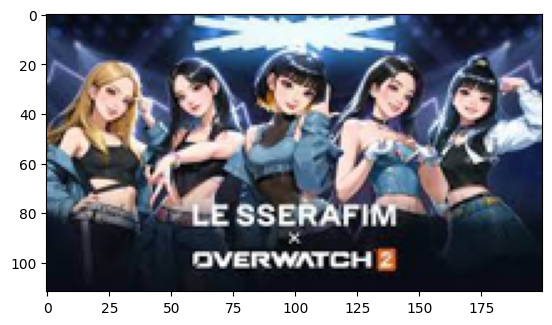

In [29]:
from PIL import Image

im = Image.open("overwatch.jpg")

width = 200
height = im.height * 200 // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

In [30]:
#imnp = np.array(im)
#imnp.shape # (112, 200, 3) height, width, rgb


# 데이터 준비 & k-means 알고리즘 적용
k=30
pixels = np.array(im).reshape((-1, 3))
assignments, centroids = kmeans(k, pixels)



C:\Users\user\AppData\Local\Temp\ipykernel_120\2486767273.py:23: RuntimeWarning: Mean of empty slice.
  centroids = np.array([points[np.array(assignments) == cid].mean(axis=0) for cid, c in enumerate(centroids)])
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


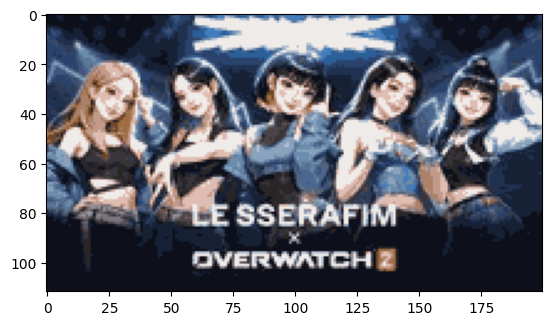

In [31]:
# 모든 픽셀의 색을 centroid중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
    pixels[i] = centroids[a]

new_im = Image.fromarray(pixels.reshape((im.height, im.width, 3)))
    
plt.imshow(new_im)
plt.show()

k-means using sklearn

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


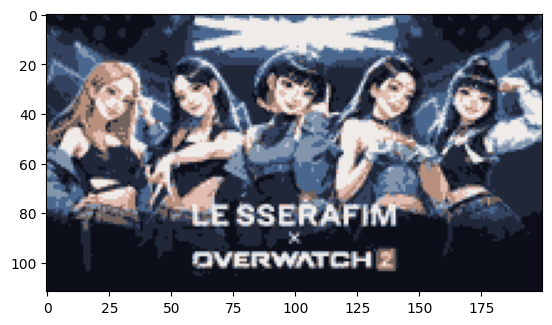

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10) # n_clusters == k값
kmeans.fit(pixels)

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
    pixels[i] = kmeans.cluster_centers_[a]
new_im = Image.fromarray(pixels.reshape((im.height, im.width, 3)))
    
plt.imshow(new_im)
plt.show()